# Polynomial-logistic-regression

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df  = pd.read_csv('concertriccir2.csv')

In [5]:
df.head()

,X,Y,class
0,0.70,-0.247,0.0
1,-3.95,2.740,1.0
2,0.15,-2.160,1.0
3,-1.67,-0.942,1.0
4,2.56,-1.850,1.0


In [6]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

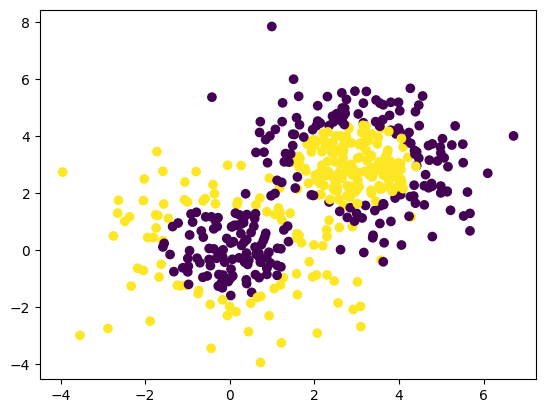

In [7]:
plt.scatter(X[:,0],X[:,1],c=y)

In [11]:
from sklearn.linear_model import LogisticRegression 

clf = LogisticRegression()   # <-- Add () here

clf.fit(X, y)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


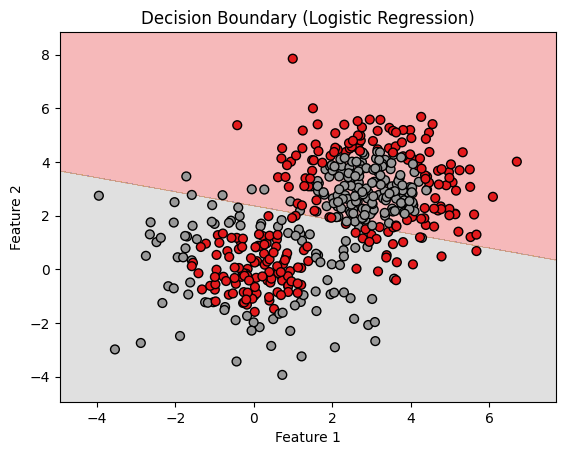

In [22]:
# Create a mesh grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict for each point in the grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and points
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Set1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, edgecolor='k', cmap=plt.cm.Set1)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary (Logistic Regression)')
plt.show()

In [24]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(clf,X,y,scoring='accuracy',cv=10))

np.float64(0.398)

In [25]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3,include_bias=False)
X_trf =  poly.fit_transform(X)


In [26]:
clf1 = LogisticRegression()
np.mean(cross_val_score(clf1,X_trf,y,scoring='accuracy',cv=10))

C:\Users\ayush singh\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ayush singh\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.or

np.float64(0.844)

In [30]:
def plot_decision_boundary(X, y, degree=1):
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import cross_val_score
    import numpy as np
    import matplotlib.pyplot as plt

    # Polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_trf = poly.fit_transform(X)

    # Instantiate classifier
    clf = LogisticRegression(max_iter=500)
    clf.fit(X_trf, y)

    # Compute cross-validation accuracy
    accuracy = np.mean(cross_val_score(clf, X_trf, y, scoring='accuracy', cv=10))

    # Create meshgrid for plotting
    a = np.arange(start=X[:,0].min()-1, stop=X[:,0].max()+1, step=0.01)
    b = np.arange(start=X[:,1].min()-1, stop=X[:,1].max()+1, step=0.01)
    XX, YY = np.meshgrid(a, b)

    # Predict over the grid
    input_array = np.c_[XX.ravel(), YY.ravel()]
    labels = clf.predict(poly.transform(input_array))

    # Plot
    plt.contourf(XX, YY, labels.reshape(XX.shape), alpha=0.5, cmap=plt.cm.Set1)
    plt.scatter(X[:,0], X[:,1], c=y, edgecolor='k', cmap=plt.cm.Set1)
    plt.title(f'Degree = {degree}, accuracy = {accuracy:.4f}')
    plt.show()
